In [62]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import time
import datetime as dt
import glob
import seaborn as sns
from colour import Color
import folium
from folium import plugins
from itertools import cycle, islice

In [2]:
def all_csv_df():
    '''
    Loops through the .csv in /raw and concatonates them into 1 Dataframe
    '''
    path = r'/Users/AaronLee/Documents/GalvanizeDSI/UnsplashEDA/raw'
    all_files = glob.glob(path + "/*.csv")

    list_holder = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        list_holder.append(df)

    US_df = pd.concat(list_holder, axis=0, ignore_index=True)
    return US_df

In [3]:
full_df = all_csv_df()

In [4]:
len(full_df['id'].unique())

1930

In [5]:
len(full_df['user.name'].unique())

814

In [ ]:
# full_df.describe()

In [ ]:
# for col in full_df.columns: 
#     print(col) 

In [6]:
Unsplash_df = full_df.drop_duplicates()

In [7]:
Unsplash_df.describe()

,downloads,exif.aperture,exif.focal_length,exif.iso,height,likes,location.position.latitude,location.position.longitude,user.total_collections,user.total_likes,user.total_photos,views,width
count,3373.000000,2966.000000,2969.000000,3028.000000,3373.000000,3373.000000,113.000000,113.000000,3373.000000,3373.000000,3373.000000,3.373000e+03,3373.000000
mean,941.444708,4.283682,53.395049,583.112946,4697.327009,45.579306,27.604363,13.382415,5.405870,525.187667,246.605692,5.088218e+05,4234.124815
std,634.744276,3.396220,58.190662,1153.299864,1426.748678,40.691458,31.388593,85.066094,15.269421,2060.669565,646.134422,8.586200e+05,1404.238644
min,23.000000,1.000000,0.000000,16.000000,1856.000000,1.000000,-42.890000,-123.993139,0.000000,0.000000,0.000000,7.130000e+03,1683.000000
25%,581.000000,2.000000,25.000000,100.000000,3700.000000,19.000000,14.135839,-48.557194,0.000000,3.000000,30.000000,2.827980e+05,3377.000000
50%,807.000000,3.200000,42.000000,200.000000,4566.000000,34.000000,40.326128,9.993682,1.000000,26.000000,75.000000,3.874090e+05,4000.000000
75%,1132.000000,5.600000,55.000000,640.000000,5666.000000,58.000000,47.214658,99.302539,4.000000,167.000000,207.000000,4.953870e+05,5117.000000
max,7462.000000,29.000000,600.000000,25600.000000,16384.000000,371.000000,70.941727,151.209295,192.000000,22125.000000,6637.000000,1.405988e+07,16384.000000


In [8]:
Unsplash_df = Unsplash_df[['id', 'user.username', 'created_at', 'views', 'likes', 'downloads', 'exif.make', 'exif.aperture', 'location.country', 'user.total_photos', 'user.total_collections', 'user.instagram_username', 'user.twitter_username', 'color']]

In [9]:
Unsplash_df.describe()

,views,likes,downloads,exif.aperture,user.total_photos,user.total_collections
count,3.373000e+03,3373.000000,3373.000000,2966.000000,3373.000000,3373.000000
mean,5.088218e+05,45.579306,941.444708,4.283682,246.605692,5.405870
std,8.586200e+05,40.691458,634.744276,3.396220,646.134422,15.269421
min,7.130000e+03,1.000000,23.000000,1.000000,0.000000,0.000000
25%,2.827980e+05,19.000000,581.000000,2.000000,30.000000,0.000000
50%,3.874090e+05,34.000000,807.000000,3.200000,75.000000,1.000000
75%,4.953870e+05,58.000000,1132.000000,5.600000,207.000000,4.000000
max,1.405988e+07,371.000000,7462.000000,29.000000,6637.000000,192.000000


# Does Camera Model make a Difference?

In [ ]:
Unsplash_df['exif.make'].value_counts()

### Breakdown of Camera usage (Top 5)

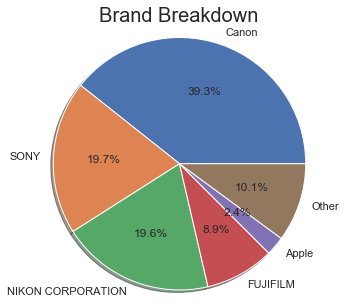

In [65]:
# pie chart of workers
labels = ['Canon', 'SONY', 'NIKON CORPORATION', 'FUJIFILM', 'Apple', 'Other']
sizes = [Unsplash_df['exif.make'].value_counts()[0],
         Unsplash_df['exif.make'].value_counts()[1],
         Unsplash_df['exif.make'].value_counts()[2],
         Unsplash_df['exif.make'].value_counts()[3],
         Unsplash_df['exif.make'].value_counts()[4],
         sum(Unsplash_df['exif.make'].value_counts()[5:])
        ]

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Brand Breakdown', fontsize=20)
plt.show()

In [217]:
model_df = Unsplash_df.groupby(['exif.make']).mean()

In [218]:
target_model = model_df.loc[['Canon', 'SONY', 'NIKON CORPORATION', 'FUJIFILM', 'Apple']].sort_index(ascending=False).reset_index()

In [219]:
target_model

,exif.make,views,likes,downloads,exif.aperture,user.total_photos,user.total_collections,red,green,blue
0,SONY,516158.181818,43.269421,896.180165,4.244251,208.376860,4.871074,148.390083,135.380165,122.942149
1,NIKON CORPORATION,428935.208882,44.532895,890.799342,4.384158,186.963816,2.944079,154.220395,140.570724,127.638158
2,FUJIFILM,606049.459854,43.306569,979.357664,3.777491,257.857664,4.598540,158.153285,154.835766,150.521898
3,Canon,547671.714168,46.869852,988.975288,4.490569,259.580725,7.694399,155.381384,144.299835,136.363262
4,Apple,396397.506667,45.146667,864.866667,2.021622,274.213333,2.626667,115.293333,108.720000,105.040000


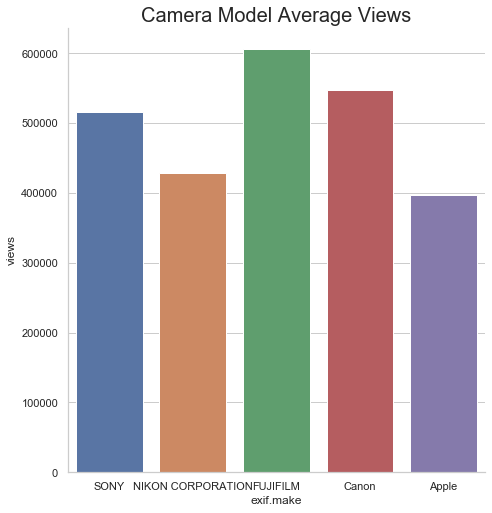

In [220]:
sns.catplot(x='exif.make', y='views', data=target_model, kind='bar', height=7)
plt.title('Camera Model Average Views', fontsize=20);

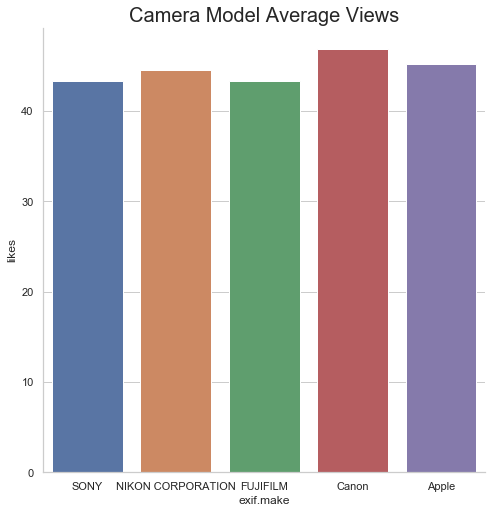

In [221]:
sns.catplot(x='exif.make', y='likes', data=target_model, kind='bar', height=7)
plt.title('Camera Model Average Views', fontsize=20);

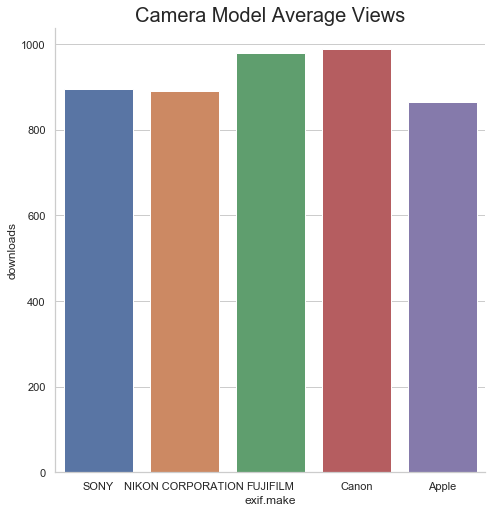

In [222]:
sns.catplot(x='exif.make', y='downloads', data=target_model, kind='bar', height=7)
plt.title('Camera Model Average Views', fontsize=20);

# Is More Total Photos Correlated with more Engagment?

In [223]:
user_group = Unsplash_df.groupby(['user.username'])

In [224]:
user_group.first()

,id,created_at,views,likes,downloads,exif.make,exif.aperture,location.country,user.total_photos,user.total_collections,user.instagram_username,user.twitter_username,color,rgb,red,green,blue,main_color
user.username,,,,,,,,,,,,,,,,,,
3031n,WsnHPosXuP8,2019-08-08T11:57:02-04:00,859428,207,2218,Canon,9.0,Macedonia,15,0,3031n,3031n1,#DA6315,"(218, 99, 21)",218,99,21,red
_andreamin,WBVtiPh_juA,2019-08-07T02:33:50-04:00,476146,18,671,HUAWEI,1.8,NaN,21,0,_andreamin,NaN,#FCFCFC,"(252, 252, 252)",252,252,252,white
_ferh97,pOmr_qQRgiU,2019-08-27T10:25:21-04:00,202747,17,595,NaN,NaN,Mexico,23,3,_ferh97,_ferh97,#0D0E0E,"(13, 14, 14)",13,14,14,black
_kennpyfilm,0U83Pws2FFU,2019-08-24T02:44:59-04:00,524554,57,1311,DJI,2.6,Japan,8,0,_kennpyfilm,_kennpyfilm,#131512,"(19, 21, 18)",19,21,18,black
_masonsummers,2Cd3PvQrbNg,2019-08-08T20:32:07-04:00,496993,25,687,SONY,2.8,Greece,10,0,_MasonSummers,_MasonSummers,#C58E76,"(197, 142, 118)",197,142,118,yellow
_mateoofdez_,4nKnpaPTZh4,2019-08-30T17:43:09-04:00,234066,55,709,Apple,2.2,Spain,8,3,itsmxthxw,NaN,#070505,"(7, 5, 5)",7,5,5,black
_miltiadis_,qnKuOYwD1Qw,2019-08-15T07:05:23-04:00,664946,19,1145,Canon,3.5,USA,76,0,_miltiadis_,AfterToneBeats,#070D0E,"(7, 13, 14)",7,13,14,black
_peterclarkson_,6BSNwnMvShg,2019-08-23T06:37:54-04:00,401001,20,602,FUJIFILM,2.0,NaN,32,0,_peterclarkson,_PeterClarkson,#F0F2F4,"(240, 242, 244)",240,242,244,white
a2eorigins,TPtgs78ISXI,2019-08-20T21:49:55-04:00,866415,85,1376,Canon,1.4,United States,128,0,A2EORIGINS,alexa2e,#F8F8FA,"(248, 248, 250)",248,248,250,white


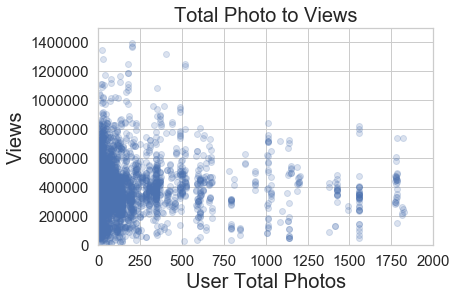

In [225]:
x = Unsplash_df['user.total_photos'].tolist()
y_view = Unsplash_df['views'].tolist()

plt.scatter(x, y_view, alpha=0.2)
plt.title('Total Photo to Views', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Views', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 2000)
plt.ylim(0, 1500000);

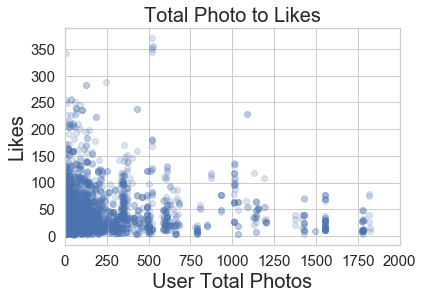

In [226]:
x = Unsplash_df['user.total_photos'].tolist()
y_likes = Unsplash_df['likes'].tolist()

plt.scatter(x, y_likes, alpha=0.2)
plt.title('Total Photo to Likes', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Likes', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 2000);
# plt.ylim(0, 1500000);

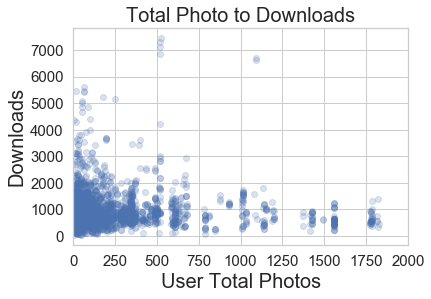

In [227]:
x = Unsplash_df['user.total_photos'].tolist()
y_dl = Unsplash_df['downloads'].tolist()

plt.scatter(x, y_dl, alpha=0.2)
plt.title('Total Photo to Downloads', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Downloads', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 2000);
# plt.ylim(0, 1500000);

# Aperture Comparison

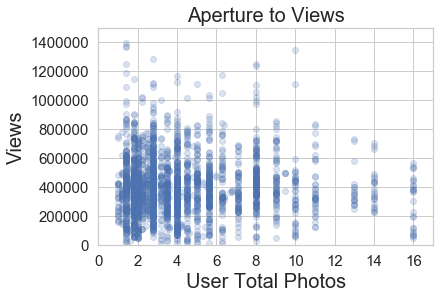

In [228]:
x1 = Unsplash_df['exif.aperture'].tolist()

plt.scatter(x1, y_view, alpha=0.2)
plt.title('Aperture to Views', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Views', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 17)
plt.ylim(0, 1500000);

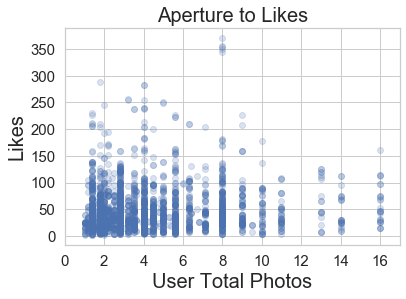

In [229]:
x1 = Unsplash_df['exif.aperture'].tolist()

plt.scatter(x1, y_likes, alpha=0.2)
plt.title('Aperture to Likes', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Likes', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 17);

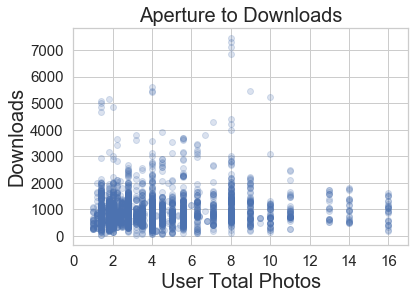

In [230]:
x1 = Unsplash_df['exif.aperture'].tolist()

plt.scatter(x1, y_dl, alpha=0.2)
plt.title('Aperture to Downloads', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Downloads', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 17);

# Location Relevance

In [231]:
loc_group = Unsplash_df.groupby(['location.country'])

In [232]:
loc_group.mean()

,views,likes,downloads,exif.aperture,user.total_photos,user.total_collections,red,green,blue
location.country,,,,,,,,,
New Zealand,3.858480e+05,41.000000,664.000000,4.000000,44.000000,0.000000,30.000000,24.000000,24.000000
Australia,4.935186e+05,69.846154,1107.410256,8.200000,170.692308,3.256410,124.153846,123.666667,89.076923
Austria,3.463472e+05,27.000000,588.700000,2.180000,30.300000,0.900000,80.600000,83.000000,88.700000
Bali,5.437510e+05,39.500000,1633.000000,2.650000,29.000000,4.000000,134.500000,129.000000,128.000000
"Bavaria, Germany",4.382701e+05,18.857143,749.571429,2.300000,1779.142857,34.000000,78.285714,83.428571,84.285714
Brasil,5.384913e+05,33.166667,1046.333333,3.916667,134.000000,1.500000,127.500000,128.333333,129.333333
Brazil,4.290439e+05,20.555556,687.777778,2.533333,160.111111,1.777778,183.888889,172.777778,169.000000
Bulgaria,1.862840e+05,23.000000,448.000000,2.600000,4.000000,0.000000,242.000000,203.000000,175.000000
CANADA,7.260715e+05,90.250000,1649.000000,6.275000,164.000000,11.000000,170.000000,170.250000,157.500000


# Hex --> RBG

In [233]:
# Unsplash_df['color'].value_counts()

In [234]:
#Appending colors to a singular list

color_list = Unsplash_df['color'].tolist()
rgb_list = []

for i in color_list:
    h = i.lstrip('#')
    rgb_list.append(tuple(int(h[i:i+2], 16) for i in (0, 2, 4)))

# rgb_list

In [235]:
#Splitting into 3 categories

red = []
green = []
blue = []

for i in rgb_list:
    red.append(i[0])
    
for i in rgb_list:
    green.append(i[1])

for i in rgb_list:
    blue.append(i[2])
    
# Making new columns to dataframe
Unsplash_df['rgb'] = rgb_list
Unsplash_df['red'] = red
Unsplash_df['green'] = green
Unsplash_df['blue'] = blue

In [236]:
'''
red_plot = Unsplash_df['red'].value_counts().plot(kind='hist', bins=30, alpha=0.4)
green_plot = Unsplash_df['green'].value_counts().plot(kind='hist', bins=30, alpha=0.4)
blue_plot = Unsplash_df['blue'].value_counts().plot(kind='hist', bins=30, alpha=0.4);
'''

"\nred_plot = Unsplash_df['red'].value_counts().plot(kind='hist', bins=30, alpha=0.4)\ngreen_plot = Unsplash_df['green'].value_counts().plot(kind='hist', bins=30, alpha=0.4)\nblue_plot = Unsplash_df['blue'].value_counts().plot(kind='hist', bins=30, alpha=0.4);\n"

## Distribution Based on Color

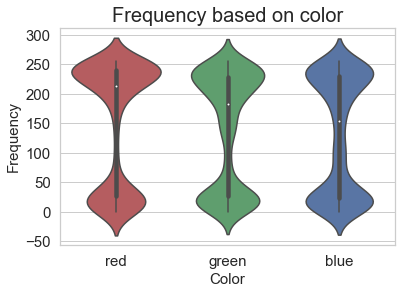

In [59]:
sns.set(style='whitegrid')
my_pal = {"red": "r", "green": "g", "blue":"b"}
sns.violinplot(data=Unsplash_df[['red', 'green', 'blue']], palette=my_pal)
plt.title('Frequency based on color', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Color', fontsize=15)
plt.ylabel('Frequency', fontsize=15);

In [14]:
Unsplash_df.describe()
# r = 151
# g = 140
# b = 130

,views,likes,downloads,exif.aperture,user.total_photos,user.total_collections,red,green,blue
count,3.373000e+03,3373.000000,3373.000000,2966.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000
mean,5.088218e+05,45.579306,941.444708,4.283682,246.605692,5.405870,151.552920,140.367329,131.066410
std,8.586200e+05,40.691458,634.744276,3.396220,646.134422,15.269421,101.977392,96.272615,98.786203
min,7.130000e+03,1.000000,23.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.827980e+05,19.000000,581.000000,2.000000,30.000000,0.000000,27.000000,27.000000,23.000000
50%,3.874090e+05,34.000000,807.000000,3.200000,75.000000,1.000000,213.000000,183.000000,154.000000
75%,4.953870e+05,58.000000,1132.000000,5.600000,207.000000,4.000000,241.000000,229.000000,230.000000
max,1.405988e+07,371.000000,7462.000000,29.000000,6637.000000,192.000000,255.000000,255.000000,255.000000


### Seperation values function for each color

In [28]:
#Categorizes color in a binary way

bin_list = []

for i in rgb_list:
    if i[0] > 151 and i[1] < 140 and i[2] < 130:
        bin_list.append('red')
    elif i[0] > 151 and i[1] < 140 and i[2] > 130:
        bin_list.append('magenta')
    elif i[0] > 151 and i[1] > 140 and i[2] < 130:
        bin_list.append('yellow')
    elif i[0] > 151 and i[1] > 140 and i[2] > 130:
        bin_list.append('white')
    elif i[0] < 151 and i[1] > 140 and i[2] > 130:
        bin_list.append('cyan')
    elif i[0] < 151 and i[1] > 140 and i[2] < 130:
        bin_list.append('lime')
    elif i[0] < 151 and i[1] < 140 and i[2] > 130:
        bin_list.append('blue')
    else:
        bin_list.append('black')

# bin_list

In [19]:
#Makes new column with seperated color
Unsplash_df['main_color'] = bin_list

In [63]:
Unsplash_df

,id,user.username,created_at,views,likes,downloads,exif.make,exif.aperture,location.country,user.total_photos,user.total_collections,user.instagram_username,user.twitter_username,color,rgb,red,green,blue,main_color
0,orVg0K35hlw,anitaaustvika,2019-08-11T02:16:27-04:00,714716,118,1460,NIKON CORPORATION,2.8,NaN,336,0,rareflower_photography,NaN,#26150A,"(38, 21, 10)",38,21,10,black
1,xvPXJy2su0g,schluditsch,2019-08-18T20:46:07-04:00,301662,29,567,Canon,4.5,NaN,32,9,schluditsch,NaN,#201D1A,"(32, 29, 26)",32,29,26,black
2,QS-19iV-uC4,janellesoto_,2019-08-27T05:47:45-04:00,280267,66,1175,SONY,7.1,NaN,23,0,janellesoto_,NaN,#553E42,"(85, 62, 66)",85,62,66,black
3,vP7gLpFYyq4,elijahsad,2019-08-06T05:46:58-04:00,525334,56,1309,SONY,1.8,NaN,97,0,elijah_tmn,Elijah_sad,#E9E7EC,"(233, 231, 236)",233,231,236,white
4,wzEGhQJOEbA,mrthetrain,2019-08-22T16:15:50-04:00,219458,6,426,Canon,1.8,NaN,349,62,mr_theTrain,mrtheTrain,#E6E8D6,"(230, 232, 214)",230,232,214,white
5,GJCWFap8gWE,byrdman85,2019-08-09T16:30:17-04:00,444788,16,661,NaN,NaN,NaN,98,1,Ash_photography_85,NaN,#F4F6F8,"(244, 246, 248)",244,246,248,white
6,gs7biLqCDDQ,worldsbetweenlines,2019-08-12T01:38:36-04:00,421988,54,946,Canon,1.4,NaN,1188,27,shot.with.canon,LoveTheBicycle,#E9DCCF,"(233, 220, 207)",233,220,207,white
7,yhz3Nus7zS0,ekrulila,2019-09-02T05:36:41-04:00,85628,19,294,NIKON CORPORATION,2.0,NaN,17,0,ekrulila,ekrulila,#151414,"(21, 20, 20)",21,20,20,black
8,FESBgp8i9lY,hadleyjin_,2019-08-13T03:42:51-04:00,1124169,283,2753,Canon,4.0,NaN,128,0,hadleyjin,HadleyJin,#8C8893,"(140, 136, 147)",140,136,147,blue
9,dqcAlGZb4KM,ellienelie,2019-08-08T07:41:49-04:00,413072,43,765,Canon,2.8,NaN,94,1,ellieelien,NaN,#CBD0D1,"(203, 208, 209)",203,208,209,white


In [32]:
Unsplash_df['main_color'].value_counts()

white      1670
black      1239
yellow      228
red         142
cyan         51
blue         37
magenta       6
Name: main_color, dtype: int64

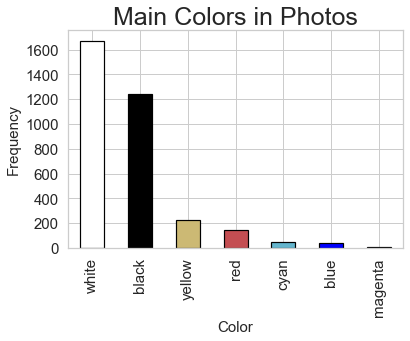

In [61]:
my_colors = list(islice(cycle(['w', 'black', 'y', 'r', 'c', 'blue', 'm']), None, len(Unsplash_df)))
Unsplash_df['main_color'].value_counts().plot.bar(color=my_colors, edgecolor= 'black', linewidth=1.2)
plt.title('Main Colors in Photos', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Color', fontsize=15)
plt.ylabel('Frequency', fontsize=15);

In [116]:
canon = Unsplash_df[Unsplash_df['exif.make'] == 'Canon'].groupby('main_color')
nikon = Unsplash_df[Unsplash_df['exif.make'] == 'NIKON CORPORATION'].groupby('main_color')
sony = Unsplash_df[Unsplash_df['exif.make'] == 'SONY'].groupby('main_color')
fujifilm = Unsplash_df[Unsplash_df['exif.make'] == 'FUJIFILM'].groupby('main_color')
apple = Unsplash_df[Unsplash_df['exif.make'] == 'Apple'].groupby('main_color')

In [193]:
canon_dict = canon['main_color'].count().to_dict()
nikon_dict = nikon['main_color'].count().to_dict()
sony_dict = sony['main_color'].count().to_dict()
fujifilm_dict = fujifilm['main_color'].count().to_dict()
apple_dict = apple['main_color'].count().to_dict()

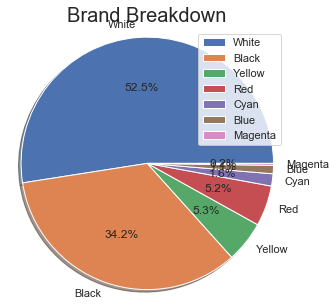

In [216]:
labels = ['White', 'Black', 'Yellow', 'Red', 'Cyan', 'Blue', 'Magenta']
sizes = [canon_dict['white'],
         canon_dict['black'],
         canon_dict['yellow'],
         canon_dict['red'],
         canon_dict['cyan'],
         canon_dict['blue'], 
         canon_dict['magenta']
        ]

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Brand Breakdown', fontsize=20)
plt.legend()
plt.show()

In [194]:
sony_dict

{'black': 245, 'blue': 3, 'cyan': 10, 'red': 27, 'white': 268, 'yellow': 52}

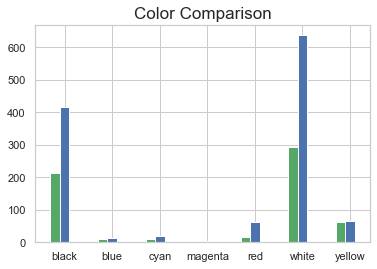

In [195]:
X = np.arange(len(canon_dict))
ax = plt.subplot(111)
ax.bar(X, canon_dict.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, nikon_dict.values(), width=0.2, color='g', align='center')
# ax.bar(X-0.4, sony_dict.values(), width=0.2, color='y', align='center')
# ax.bar(X-0.6, fujifilm_dict.values(), width=0.2, color='m', align='center')
# ax.bar(X-0.8, apple_dict.values(), width=0.2, color='c', align='center')
# ax.legend(('Canon','Nikon'))
plt.xticks(X, canon_dict.keys())
plt.title("Color Comparison", fontsize=17)
plt.show()

<BarContainer object of 7 artists>

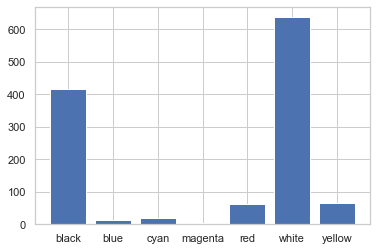

In [148]:
plt.bar(canon_dict.keys(), canon_dict.values())

In [97]:
Unsplash_df[['exif.make', 'main_color']].dropna()

,exif.make,main_color
0,NIKON CORPORATION,black
1,Canon,black
2,SONY,black
3,SONY,white
4,Canon,white
6,Canon,white
7,NIKON CORPORATION,black
8,Canon,blue
9,Canon,white
10,Canon,yellow


# Holistic Multi Plots

In [ ]:
plt.subplots(1, figsize=(12,10))
sns.heatmap(Unsplash_df[['views', 'likes', 'downloads', 'user.total_photos', 'exif.aperture']].corr(), annot=True);

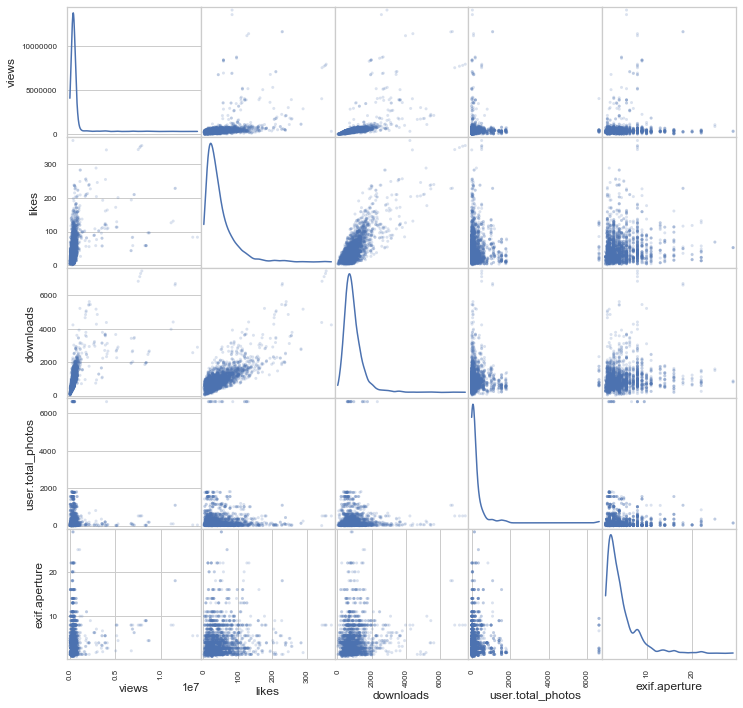

In [64]:
pd.plotting.scatter_matrix(Unsplash_df[['views', 'likes', 'downloads', 'user.total_photos', 'exif.aperture']].applymap(lambda x:x*1), alpha=0.2, figsize=(12,12), diagonal='kde');

# Mapping Lat and Long

In [ ]:
map_df = full_df[['user.username', 'location.position.latitude', 'location.position.longitude']].dropna()
map_df

In [ ]:
m = folium.Map([46.196358, 6.473567], zoom_start=11)
m

In [ ]:
for index, row in map_df.iterrows():
    folium.CircleMarker([row['location.position.latitude'], row['location.position.longitude']],
                        radius=15,
                        popup=row['user.username'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [ ]:
stationArr = map_df[['location.position.latitude', 'location.position.longitude']].as_matrix()
m.add_children(plugins.HeatMap(stationArr, radius=15))
m